In [4]:
import pandas as pd
import numpy as np
fichero = pd.read_csv("D:\Maestría Big Data\Clases 1er Semestre\Métodos de Captura y Almacenamiento de Datos\Actividad 1 - Limpieza de Datos\data_act_01.csv", sep=";")
fichero.head()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection


In [5]:
fichero.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

In [6]:
shap = fichero.shape
producto = np.product(fichero.shape)
print(shap, producto)

(10051, 12) 120612


In [7]:
fichero1 = fichero
fichero1 = fichero1.dropna(axis=1) #borra lascolumnas con almenosun NaN
fichero1.head()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,1,Intersection


In [8]:
fichero2 = fichero
fichero2 = fichero2.loc[:,'Address':'AddressType']
fichero2.head()

,Address,City,State,AgencyId,Range,AddressType
0,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection


In [9]:
fichero2.fillna(0).head() #llenar todos los valores de NaN con 0

,Address,City,State,AgencyId,Range,AddressType
0,100 Block Of Chilton Av,San Francisco,CA,1,0.0,Premise Address
1,2300 Block Of Market St,San Francisco,CA,1,0.0,Premise Address
2,2300 Block Of Market St,San Francisco,CA,1,0.0,Premise Address
3,500 Block Of 7th St,San Francisco,CA,1,0.0,Premise Address
4,Beale St/bryant St,San Francisco,CA,1,0.0,Intersection


In [10]:
fichero3 = fichero2.fillna(method='bfill', axis=0).fillna(0) # reemplazar todos los valor de NaN con el valor anterior, despues rellenarloscon 0
fichero3.head()

,Address,City,State,AgencyId,Range,AddressType
0,100 Block Of Chilton Av,San Francisco,CA,1,0.0,Premise Address
1,2300 Block Of Market St,San Francisco,CA,1,0.0,Premise Address
2,2300 Block Of Market St,San Francisco,CA,1,0.0,Premise Address
3,500 Block Of 7th St,San Francisco,CA,1,0.0,Premise Address
4,Beale St/bryant St,San Francisco,CA,1,0.0,Intersection


In [51]:
dato1 = fichero3.isnull().sum()
dato2 = fichero2.shape
print(dato1, dato2)

Address        0
City           0
State          0
AgencyId       0
Range          0
AddressType    0
dtype: int64 (10051, 6)


In [56]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 5.7 MB/s eta 0:00:00
     --------------------------------------- 10.7/10.7 MB 25.2 MB/s eta 0:00:00
     ------------------------------------- 307.7/307.7 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [57]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

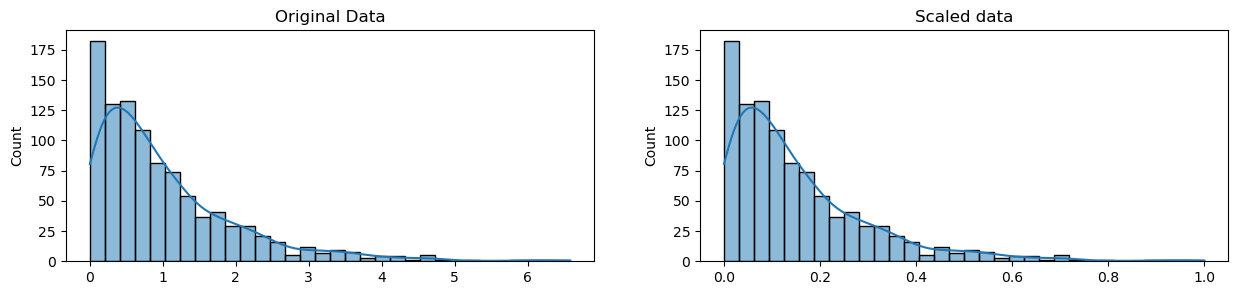

In [58]:
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

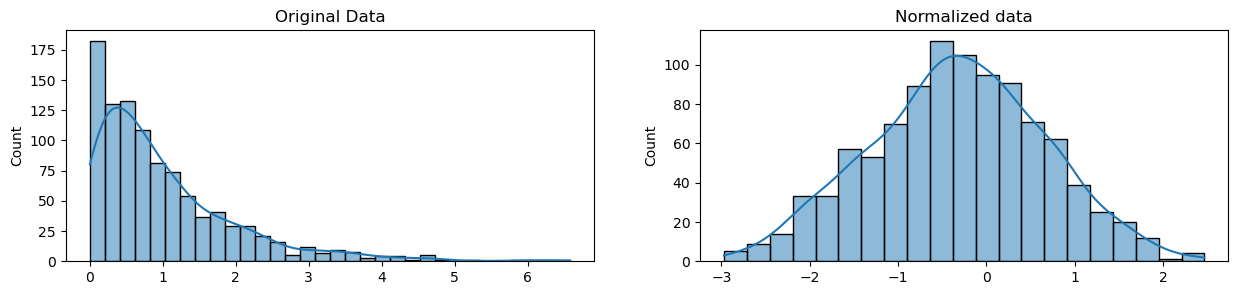

In [59]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [15]:
fichero['OffenseDate'].head()

0    2016-03-30T00:00:00
1    2016-03-31T00:00:00
2    2016-03-31T00:00:00
3    2016-03-31T00:00:00
4    2016-03-31T00:00:00
Name: OffenseDate, dtype: object

In [16]:
fichero['OffenseDate'].dtype

dtype('O')

In [17]:
fichero['OffenseDate'] = pd.to_datetime(fichero['OffenseDate'], format="%Y/%m/%d")
#landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

In [18]:
fichero['OffenseDate']

0       2016-03-30
1       2016-03-31
2       2016-03-31
3       2016-03-31
4       2016-03-31
           ...    
10046   2016-04-05
10047   2016-04-05
10048   2016-04-05
10049   2016-04-05
10050   2016-04-05
Name: OffenseDate, Length: 10051, dtype: datetime64[ns]

In [19]:
# get the day of the month from the date_parsed column
day_of_month = fichero['OffenseDate'].dt.day #can be month or year
day_of_month.head()

0    30
1    31
2    31
3    31
4    31
Name: OffenseDate, dtype: int64

(array([6676., 3287.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          88.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

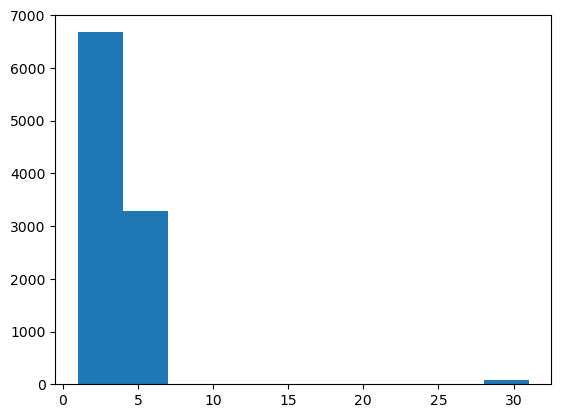

In [63]:
plt.hist(fichero['OffenseDate'].dt.day)

In [64]:
fichero['OffenseDate'].dt.day.value_counts()

2     2259
4     2257
1     2224
3     2193
5     1030
31      87
30       1
Name: OffenseDate, dtype: int64

In [23]:
date_lengths = fichero1.OffenseDate.str.len()
date_lengths.value_counts()

19    10051
Name: OffenseDate, dtype: int64

In [24]:
indices = np.where([date_lengths == 19])[1]
print('Indices with corrupted data:', indices)
fichero1.loc[indices]

Indices with corrupted data: [    0     1     2 ... 10048 10049 10050]


,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,1,Intersection
...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,1,Geo-Override


In [25]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [26]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [27]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [28]:
print(after.decode("utf-8"))

This is the euro symbol: €


In [29]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


In [30]:
lengths = fichero['CrimeId'].value_counts()
lengths

160950496    3
160913455    3
160943740    1
160943710    1
160943712    1
            ..
160931823    1
160931824    1
160931825    1
160931827    1
160964249    1
Name: CrimeId, Length: 10047, dtype: int64

In [31]:
indices = np.where([lengths > 1])[1]
print('Indices with corrupted data:', indices)
fichero.loc[indices]

Indices with corrupted data: [0 1]


,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address


In [32]:
duplicados = fichero['CrimeId'].duplicated()
indices = np.where([duplicados == True])[1]
print('Indices with corrupted data:', indices)
fichero.loc[indices]

Indices with corrupted data: [1707 3792 7046 7047]


,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
1707,160913455,Susp,2016-04-01,18:29,2016-04-01T18:29:00,GOA,Geary St/larkin St,San Francisco,CA,1,NaN,Intersection
3792,160913455,Passing Call,2016-04-02,17:11,2016-04-02T17:11:00,Not recorded,900 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
7046,160950496,Suspicious Vehicle,2016-04-04,6:51,2016-04-04T06:51:00,ND,1400 Block Of Cabrillo St,San Francisco,CA,1,NaN,Premise Address
7047,160950496,Trespasser,2016-04-04,6:51,2016-04-04T06:51:00,CAN,Block Of Hampshire St,San Francisco,CA,1,NaN,Premise Address


In [33]:
a = fichero['CrimeId'] == 160913455

In [34]:
fichero['CrimeId'].astype('int')

0        160903280
1        160912272
2        160912590
3        160912801
4        160912811
           ...    
10046    160964210
10047    160964216
10048    160964227
10049    160964229
10050    160964249
Name: CrimeId, Length: 10051, dtype: int32

In [35]:
# convert to lower case
fichero['City'] = fichero['City'].str.lower()
# remove trailing white spaces
fichero['City'] = fichero['City'].str.strip()
fichero

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,san francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,san francisco,CA,1,NaN,Premise Address
2,160912590,Susp Info,2016-03-31,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,san francisco,CA,1,NaN,Premise Address
3,160912801,Report,2016-03-31,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,san francisco,CA,1,NaN,Premise Address
4,160912811,594,2016-03-31,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,san francisco,CA,1,NaN,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,san francisco,CA,1,NaN,Intersection
10047,160964216,Traffic Stop,2016-04-05,23:43,2016-04-05T23:43:00,ADV,California St/mason St,san francisco,CA,1,NaN,Intersection
10048,160964227,Traffic Stop,2016-04-05,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,san francisco,CA,1,NaN,Intersection
10049,160964229,Passing Call,2016-04-05,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,san francisco,CA,1,NaN,Geo-Override


In [36]:
fichero.groupby(by='City').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,State,AgencyId,Range,AddressType
City,,,,,,,,,,,
brisbane,1,1,1,1,1,1,1,1,1,0,1
daly city,5,5,5,5,5,5,5,5,5,0,5
presidio,3,3,3,3,3,3,3,3,3,0,3
s,1,1,1,1,1,1,1,0,1,0,1
san francisco,9666,9666,9666,9666,9666,9666,9666,9666,9666,0,9666
treasure isla,51,51,51,51,51,51,51,51,51,0,51
yerba buena,3,3,3,3,3,3,3,3,3,0,3


In [37]:
fichero.describe()

,CrimeId,Range
count,1.005100e+04,0.0
mean,1.609394e+08,NaN
std,1.327006e+04,NaN
min,1.609033e+08,NaN
25%,1.609303e+08,NaN
50%,1.609408e+08,NaN
75%,1.609513e+08,NaN
max,1.609642e+08,NaN


In [45]:
#filtro = fichero.apply(lambda item: item['CrimeId'] <35 and item['Pclass'] == 3, axis = 1)
#dataframe2 = dataframe[filtro]
!pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [46]:
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

C:\Users\Pablo\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [47]:
cities = fichero['City'].astype('str').unique()
cities

matches = fuzzywuzzy.process.extract("san francisco", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('san francisco', 100),
 ('daly city', 36),
 ('treasure isla', 31),
 ('presidio', 29),
 ('brisbane', 29),
 ('nan', 25),
 ('yerba buena', 17),
 ('s', 14)]

In [48]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 15):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio < 15
    close_matches = [matches[0] for matches in matches if matches[1] <= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [49]:
replace_matches_in_column(df=fichero, column='City', string_to_match="san francisco")

All done!


In [66]:
cities = fichero['City'].astype('str').unique()
cities

array(['san francisco', nan, 'daly city', 'treasure isla', 'yerba buena',
       'presidio', 'brisbane'], dtype=object)